# Chapter 04
# 벡터공간 - The Vector Space

### 4.1.1 선형결합의 정의

* **Definition 4.1.1** : $v_1, …,v_n$ 각각을 벡터라고 하면, $v_1, …,v_n$ 의 *선형결합* 을 다음과 같은 합이라고 정의하자.

  $$\alpha_1v_1+ \cdots +\alpha_nv_n$$

  여기서, $\alpha_1,…,\alpha_n$은 스칼라이다. 이 선형결합에서 $\alpha_1,…,\alpha_n$ 각각은 *계수*라고 한다. $\alpha_1$은 $v_1$의 계수이고, $\alpha_2$는 $v_2$ 의 계수이며, ..., $\alpha_n$은 $v_n$의 계수이다.

### 4.1.2 선형결합의 사용

***Example 4.1.5 평균얼굴*** - p.126 <br />
이미지의 평균을 선형결합으로 나타낼 수 있다.

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [19]:
# 이미지 파일 불러오기
u = Image.open('./images/img01.PNG')
v = Image.open('./images/img02.PNG')
w = Image.open('./images/img03.PNG')
u = u.convert('L')
v = v.convert('L')
w = w.convert('L')
v = v.resize(u.size)  # 이미지 사이즈를 u의 사이즈와 같게 맞추기
w = w.resize(u.size)

# 이미지 파일을 np.asarray를 이용해 배열로 만들기
u = np.asarray(u, dtype='float32')
v = np.asarray(v, dtype='float32')
w = np.asarray(w, dtype='float32')

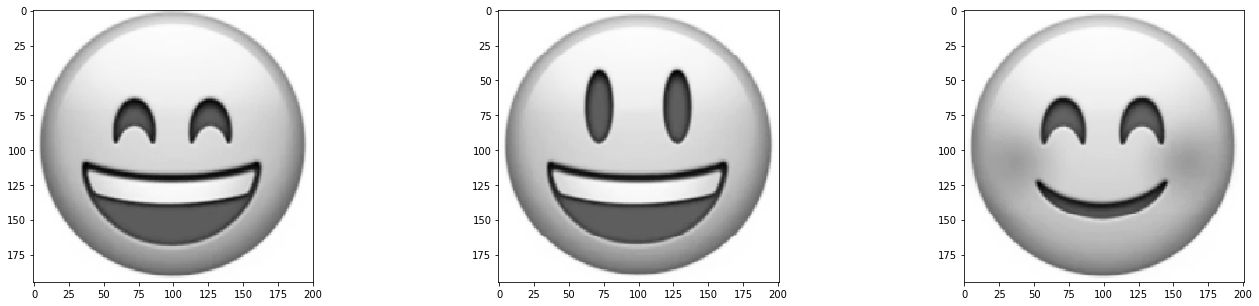

In [3]:
fig, axs = plt.subplots(1, 3, figsize=(25, 5))
fig.subplots_adjust(hspace = .5, wspace=.001)

img_org = [u, v, w]

for i, img in enumerate(img_org):
    axs[i].imshow(img ,cmap='Greys_r')

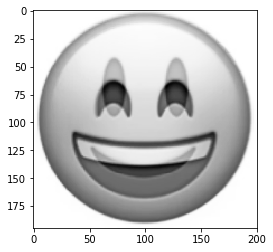

In [4]:
# 스칼라 (1/3)을 곱하여 선형결합 하기
lin_comb = (1/3) * (u + v + w)
plt.imshow(lin_comb, cmap='Greys_r')

### 4.1.3 계수에서 선형결합으로 

길이가 $n$인 벡터들의 리스트 $[v_1,…,v_n]$에 대해, 길이가 $n$인 계수들의 리스트 $[\alpha_1,...,\alpha_n]$를 대응하는 선형결합 $\alpha_1v_1+ \cdots +\alpha_nv_n$에 매핑하는 함수 $f$가 있다. 이 함수는 주어진 정의역(domain)원소에 대해 함수의 상(image, 함수값)을 찾는 문제라고 볼 수 있다. <br />
***Quiz 4.1.7*** `lin_comb(vlist, clist)`를 정의해 보자.

In [5]:
def lin_comb(vlist, clist):
    return sum([coeff * v for coeff, v in zip(vlist, clist)])

vlist = [1, 2, 3]
clist = [2, 2, 2]
lin_comb(vlist, clist)

12

## 4.2 생성(Span)

- **Definition** : 벡터들 $v_1,…,v_n$의 모든 선형결합으로 이루어진 집합을 이 벡터들의 **생성(Span)**이라 하고 $Span \{v_1, ...,v_n\}$ 라고 쓴다.

실수$\mathbb{R}$ 또는 복소수$\mathbb{C}$와 같은 무한 필드 위의 벡터들에 대해, Span은 보통 무한집합이다. 유한필드인 $GF(2)$상의 벡터들에 대한 Span은 유한하다.

***Quiz 4.2.2*** 필드 $GF(2)$상의 $Span\{[1,1],[0,1]\}$ 에 몇 개의 벡터가 있는가?

$$\begin{eqnarray} 0[1,1]+0[0,1] & = & [0,0] \\ 0[1,1]+1[0,1] & = & [0,1] \\ 1[1,1]+0[0,1] & = & [1,1] \\ 1[1,1]+1[0,1] & = & [1,0] \end{eqnarray}$$

***Quiz 4.2.4*** $2$-벡터들로 구성되는 집합에서 공집합$\emptyset $의 생성에는 몇 개의 벡터가 있는가?

빈 할당(empty assignment)으로 $[0, 0]$

***Quiz 4.2.5*** $\mathbb{R}$상의 $2$-벡터 $[2,3]$의 생성 즉, $Span\{[2,3]\}$에는 몇 개의 벡터가 있는가?

\>\>Answer : $Span\{\alpha [2,3]:\alpha \in \mathbb{R}\}$이다. 즉 무한개가 있다. 원점과 $[2,3]$을 지나는 직선 위의 점들을 구성한다.

***Quiz 4.2.6*** $Span \{v\}$ 가 유한개의 벡터들로 구성되는 $\mathbb{R}$상의 2-벡터 $v$는 무엇인가?

\>\>Answer : 영벡터$[0,0]$ 이다.

4.2.2  선형방정식들의 시스템이 암시하는 다른 방정식들 - *생략*

### 4.2.3 생성자(Generator)

* **Definition** : $\Upsilon $을 벡터들의 집합이라 하고, 만약 $v_1,...,v_n$이 $\Upsilon = Span\{v_1,...,v_n\}$을 만족하는 벡터들이면, $\{v_1,…,v_n\}$은 $\Upsilon$에 대한 *생성집합(generating set)*이라 하고 벡터 $v_1,...,v_n$을 $\Upsilon$에 대한 *생성자(generator)* 들이라고 한다.

***Example 4.2.11*** $\{[3,0,0], [0,2,0], [0,0,1]\}$은 $\mathbb{R}^3$에 대한 생성집합이라고 하기 위해서는 아래의 두 가지를 보여줘야 한다.

1. 모든 선형결합은 $\mathbb{R}^3$ 내의 벡터이다.
2. $\mathbb{R}^3$ 내의 모든 벡터는 선형결합이다.

첫 번째 경우는 $\mathbb{R}^3$가 $\mathbb{R}$상의 모든 3-벡터들을 포함하므로 명백하다. 두 번째의 경우를 증명하기 위해서는 $[x, y, z]$를 $\mathbb{R}^3$내의 임의의 벡터라고 하자. $[x,y,z]$는 선형결합으로 쓸 수 있음을 보여야한다. 

$$[x,y,z] = \frac{x}{3} [3,0,0] + \frac{y}{2} [0,2,0] + z[0,0,1]$$ 

### 4.2.4 선형결합의 선형결합

위의 Example 4.2.11에서 $\mathbb{R}^3$에 대한 또 다른 생성집합은 $\{[1,0,0],[1,1,0],[1,1,1]\}$ 이라고 하면 이 집합의 생성(Span)이 $\mathbb{R}^3$의 모든 생성을 포함한다는 것을 증명해야 한다. 위의 $\{[3,0,0], [0,2,0], [0,0,1]\}$ 벡터 각각을 선형결합으로 나타내면 된다.

$$\begin{eqnarray} [3,0,0] & = & 3[1,0,0] \\ [0,2,0] & = & -2[1,0,0]+2[1,1,0] \\ [0,0,1] & = & -1[1,0,0]-1[1,1,0]+1[1,1,1] \end{eqnarray}$$


### 4.2.5 표준 생성자 (Standard generator)

위의 Example 4.2.11에서 $[x,y,z]$를 벡터 $[3,0,0],[0,2,0],][0,01]$의 선형결합으로 표현하는 식을 보았다. 이 식은 세 개의 벡터들이  특수한 형태를 가지기 떄문이다. 만약 $[1, 0, 0], [0,1,0],[0,0,1]$을 사용한다면 더욱 간단하게 표현할 수 있다. 

$$[x,y,z] = x[1,0,0]+y[0,1,0]+z[0,0,1]$$

위의 세 벡터를 $\mathbb{R}^3$에 대한 표준 생성자라 하고 $e_0, e_1, e_2$ 로 나타낸다. 예를 들어, $\mathbb{R}^4$에 대한 표준 생성자는 $e_0, e_1, e_2, e_3$을 사용하고 $[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]$ 을 의미한다. <br />

임의의 양의 정수 $n$에 대해, $\mathbb{R}^n$에 대한 표준 생성자는 아래와 같다.

$$\begin{eqnarray} e_{ 0 } & = & [1,0,0,0,…,0] \\ e_{ 1 } & = & [0,1,0,0,…,0] \\ e_{ 2 } & = & [0,0,1,0,…,0] \\  & \vdots  &  \\ e_n & = & [0,0,0,0,…,1] \end{eqnarray}$$

***Quiz 4.2.13*** 함수, `standard(D, one)`을 작성해보자. 이 함수는 주어진 정의역 `D`와 주어진 숫자 `one`에 대해 $\mathbb{R}^D$에 대한 표준 생성자들의 리스트를 리턴한다.

In [6]:
from vec import Vec

def standard(D, one):
    return [Vec(D, {k: one/one}) for k in D]

standard({'A', 'B', 'C'}, 2)

[Vec({'A', 'C', 'B'},{'A': 1.0}),
 Vec({'A', 'C', 'B'},{'C': 1.0}),
 Vec({'A', 'C', 'B'},{'B': 1.0})]

## 4.3 벡터들의 집합에 대한 기하학적 구조

### 4.3.1 $\mathbb{R}$상의 벡터들의 생성에 대한 기하학적 구조

하나의 영이 아닌 벡터 $v$의 모든 선형결합에 대해 고려해 보자.

$$Span\{v\} = \{\alpha v : \alpha \in \mathbb{R}\}$$

위의 집합은 원점과 점 $v$를 지나는 직선을 형성한다. 직선은 1차원 객체이다. 공집합에 대한 Span은 영벡터이며, 이러한 생성(Span)은 0차원 객체로써 하나의 점으로 구성된다. <br />

***Example 4.3.1*** $Span\{[1,0],[0,1]\}$ 은 무엇일까? 이 벡터들은 $\mathbb{R}^2$에 대한 표준 생성자들이고 따라서, 모든 2-벡터는 생성(Span) 내에 있다. 즉, $Span\{[1,0],[0,1]\}$은 *유클리드 평면* 의 모든 점을 표현한다. <br />

***Example 4.3.4*** 모든 두 개의 서로 다른 벡터들은 평면을 생성할까? $Span\{[1,2],[2,4]\}$은 평면을 생성할까? 이 집합의 선형결합은 다음과 같이 쓸 수 있다.

$$\begin{eqnarray} \alpha _{ 1 }[1,2]+\alpha _{ 2 }[2,4] & = & \alpha _{ 1 }[1,2]+\alpha _{ 2 }(2[1,2]) \\  & = & \alpha _{ 1 }+(\alpha _{ 2 }\cdot 2)[1,2] \\  & = & (\alpha_{1} + 2\alpha_{2})[1,2] \end{eqnarray}$$

따라서, $Span\{[1,2],[2,4]\} = Span\{[1,2]\}$ 이다. 즉, 평면이 아니라 직선을 형성한다. 위의 예들을 통해, $\mathbb{R}$상의 두 벡터의 생성은 평면 또는 평면보다 차원이 낮은 객체(직선 또는 점)이다. 임의의 벡터들의 집합에 대한 생성은 원점을 포함해야 한다. 그이유는 모든 계수가 0인 경우 원점이기 때문이다. <br />

점, 직선, 또는 평면과 같은 기하적 객체는 *플랫(flat)* 라 한다.

- **Hypothesis** : $\mathbb{R}$상의 $k$ 벡터들의 Span(생성)은 원점을 포함하는 $k$-차원의 flat 또는 원점을 포함하는 더 낮은 차원의 flat을 형성한다.  
  - 영벡터의 생성(Span)은 점, 즉 영차원 객체를 형성한다. 바로 원점이다.
  - 하나의 벡터의 생성은 원점을 지나는 직선, 즉 1차원의 객체, 또는 원점을 형성한다. 
  - 두 벡터의 생성은 원점을 지나는 평면, 즉 2차원 객체, 또는 원점을 지나는 직선, 또는 원점을 형성한다. 

### 4.3.2 동차 선형시스템의 해집합에 대한 기하학적 구조

평면을 표현하는 좀 더 익숙한 방법은 방정식이다. 예를 들어 $\{(x,y,z) \in \mathbb{R}^3 : ax+by+cz=d\}$이다. 원점이 방정식 $ax+by+cz=d$를 만족하기 위해서는 $d$는 $0$이어야 한다. 앞으로의 예제나 개념들은 원점 $(0,0,0)$을 포함하는 평면에 대해 설명한다.<br />

***Example 4.3.7*** 평면 $Span \{[1,0,1.65],[0,1,1]\}$은 다음과 같이 나타낼 수 있다.

$$\{(x,y,z) \in \mathbb{R}^3 : 1.65x + 1y-1z=0\}$$

위의 방정식을 도트곱을 이용하면 아래와 같이 쓸 수 있다.

$$\{[x,y,z] \in \mathbb{R}^3 : [1.65,1, -1]\cdot [x,y,z]=0\}$$

위의 식을 `matplotlib` 모듈을 이용하여 코드로 나타내면 다음과 같다.

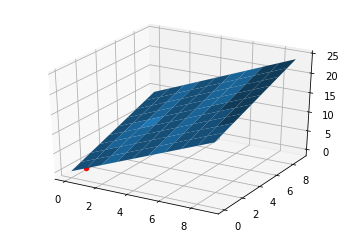

In [23]:
from mpl_toolkits.mplot3d import Axes3D

xx, yy = np.meshgrid(range(10), range(10))

zz = 1.65*xx + 1.0*yy  # 1.65x + 1y = 1z

ax = plt.subplot(projection='3d')
ax.scatter([1],[0],[1.65], color='red')
ax.plot_surface(xx, yy, zz)
plt.show()

- **Definition** : 우변이 모두 $0$인 선형시스템(선형방정식들의 컬렉션)은 *동차 선형시스템 (homogeneous linear system)*이라고 한다. 
- **Hypothesis** : 원점을 포함하는 flat은 동차 선형시스템의 해집합이다.

### 4.3.3 원점을 포함하는 flat의 두 가지 표현

위에서 원점을 포함하는 *flat*을 나타내는 두 가지 방법을 살펴보았다. 

- *어떤 벡터들의 $Span$(생성)을 이용*
- *동차 선형시스템의 해집합을 이용*

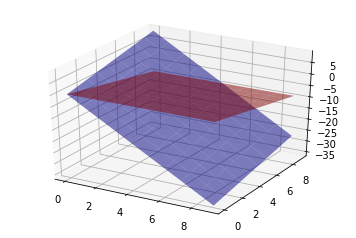

In [8]:
xx, yy = np.meshgrid(range(10), range(10))

z1 = -4*xx + yy
z2 = -1*yy
ax = plt.subplot(projection='3d')
ax.plot_surface(xx, yy, z1, color='blue', alpha=.5, linewidth=0, zorder=-1)
ax.plot_surface(xx, yy, z2, color='red', alpha=.5, linewidth=0, zorder=1)
plt.show()

## 4.4 벡터공간

### 4.4.1 두 표현의 공통점은 무엇인가?

4.3.3에서 설명한 두 가지 표현법에 대한 연관성을 알아보자. $F^D$의 부분집합 $\mathcal{V}$ 는 $\mathcal{V}$가 $F$ 상의 어떤 $D$-벡터들의 생성(Span)이거나 선형시스템의 해가 되거나에 상관없이 아래의 세 가지 성질을 가진다.

- ***Property*** $\mathbf{V1}$ : $\mathcal{V}$는 영벡터를 포함한다.
- ***Property*** $\mathbf{V2}$ : 모든 벡터 $v$에 대해, 만약 $\mathcal{V}$가 $v$를 포함하면 $\mathcal{V}$는 모든 스칼라 $\alpha$에 대해 $\alpha v$를 포함하고 ''스칼라-벡터 곱에대해 닫혀있다''라고 한다..
- ***Property*** $\mathbf{V3}$ : 모든 벡터들의 쌍 $u, v$ 에 대해, 만약 $\mathcal{V}$가 $u,v$를 포함하면 $\mathcal{V}$는 $u+v$를 포함하고 $\mathcal{V}$는 벡터 덧셈에 대해 *닫혀* 있다.

$\mathcal{V} = Span\{v_1, …,v_n\}$이라고 하면, $\mathcal{V}$는 다음을 만족한다.

![](./images/vec_space01.PNG)

이제, $\mathcal{V}$는 해집합 $\{x:a_1\cdot x=0, …, a_m \cdot x =0\}$ 이라고 하면, $\mathcal{V}$는 다음을 만족한다.

![](./images/vec_space02.PNG)

### 4.4.2 벡터공간의 정의와 예

- **Definition** : 벡터들의 집합 $\mathcal{V}$는 ***Property*** $\mathbf{V1}, \mathbf{V2}, \mathbf{V3}$을 만족하면 ***벡터공간*** 이라고 한다.
  - 따라서, 어떤 벡터들의 생성(Span)은 벡터공간이다.
  - 또한, 동차 선형시스템(homogeneous linear system)의 해집합은 벡터공간이다.
  - 원점을 포함하는 (직선 or 평면) *flat*은 어떤 벡터들의 생성(Span) 또는 선형시스템의 해집합으로 표현할 수 있으므로 벡터공간이다. 
  - 임의의 필드 $F$와 임의의 유한 정의역 $D$에 대해, $F$상의 $D$-벡터들의 집합 $F^D$는 벡터공간이다. <br />
    $\rightarrow$ $F^D$는 영벡터를 포함하고 스칼라-벡터 곱과 벡터 덧셈에 대해 닫혀있다. 예를 들어, $\mathbb{R}^2, \mathbb{R}^3, GF(2)^4$는 벡터공간이다.
  - 임의의 필드 $F$와 임의의 유한 정의역 $D$에 대해, 영벡터로 구성되는 한 원소 집합 $0_D$는 벡터공간이다.

![](./images/proof01.PNG)

### 4.4.3 부분공간(Subspace)

- **Definition** : 만약 $\mathcal{V}$와 $\mathcal{W}$는 벡터공간이고 $\mathcal{V}$가 $\mathcal{W}$의 부분집합이면, $\mathcal{V}$는 $\mathcal{W}$의 ***부분공간*** 이라고 한다.

***Example 4.4.11*** : 집합 $\{[0,0]\}$은 $\{\alpha [2, 1] : \alpha \in R\}$ 의 부분공간이고, $\{\alpha[2, 1] : \alpha \in R\}$은 $\mathbb{R}^2$의 부분공간이다.

***Example 4.4.12*** : 집합 $\mathbb{R}^2$는 $\mathbb{R}^3$에 포함되지 않기 때문에 $\mathbb{R}^3$의 부분공간이 아니다. 

***Example 4.4.13*** : $\mathbb{R}^2$에 포함된 벡터공간은 무엇인가?

- 가장 작은 벡터공간은 $\{[0,0]\}$ 이다.
- 가장 큰 벡터공간은 $\mathbb{R}^2$ 이다.
- 임의의 영이 아닌 벡터 $[a,b]$에 대해, 원점과 $[a,b]$를 지나는 직선 $Span\{[a,b]\}$는 벡터공간이다.

<br />

$\mathbb{R}^2$가 임의의 다른 부분공간을 가질까? $\mathcal{V}$는 $\mathbb{R}^2$의 부분공간이라 하자. $\mathcal{V}$는 영(0)이 아닌 어떤 벡터 $[a,b]$를 가지고 또한 $Span\{[a,b]\}$에 속하지 않는 어떤 다른 벡터 $[c, d]$를 가진다고 가정하고, 이 경우 $\mathcal{V}=\mathbb{R}^2$임을 증명해보자.

- ***Lemma 4.4.14*** : $ad \neq bc$
  - **Proof** <br />
    $[a,b] \neq [0,0]$ 이므로 $a \neq 0$ 또는 $b \neq 0$ 이거나 둘다 $0$이 아니다. <br />
    **Case 1** : $a \neq 0$ 일 경우, $\alpha = \frac{c}{a}$라고 하면, $[c,d]$는 $Span\{[a, b]\}$내에 있지 않으므로, $[c,d] \neq \alpha[a, b]$이어야 한다. 앞의 가정에서 $\alpha = \frac{c}{a}$이라고 했으므로, $c=\alpha a$이다. 따라서, $d \neq \alpha b$어야 한다. $\alpha$에 $\frac{c}{a}$를 대입하면 $d \neq \frac{c}{a}b$ 이다. 따라서, <br />$$ad \neq bc$$ 
    **Case 2** : $b \neq 0$일 경우, $\alpha = \frac{d}{b}$ 라고 하면, 위의 Case 1과 마찬가지로 $[c,d] \neq \alpha[a, b]$이고, $c \neq \alpha a$이다. 
  - 이제, $\mathcal{V} = \mathbb{R}^2$임을 증명 하기 위해 $\mathbb{R}^2$의 모든 벡터는 $\mathcal{V}$내의 두 벡터 즉, $[a, b]$ 와 $[c, d]$의 선형결합으로 나타낼 수 있음을 보여준다. <br />
    $[p,q]$를 $\mathbb{R}^2$ 내 임의의 벡터라고 하고, $\alpha = \frac{dp-cq}{ad-bc}, \beta = \frac{aq-bp}{ad-bc}$ 라고 하면, 아래와 같이 쓸 수 있다. <br />
    $$\begin{eqnarray}  &  & \alpha [a,b]+\beta [c,d] \\  & = & \frac { 1 }{ ad-bc } [(pd-qc)a+(aq-bp)c,(pd-qc)b+(aq-bp)d] \\  & = & \frac { 1 }{ ad-bc } [adp-bcp,adq-bcq] \\  & = & [p,q] \end{eqnarray}$$ <br />
    $[p,q]$는 $\mathbb{R}^2$의 임의의 원소이므로, $\mathbb{R}^2 = Span\{[a,b], [c,d]\}$ 이다.  $\mathcal{V}$는 $[a,b]$와 $[c,d]$를 포함하고 스칼라-벡터 곱셈과 벡터 덧셈에 대해 닫혀 있으므로, $\mathcal{V} = \mathbb{R}^2$임을 증명한다.


4.4.4 \*추상(Abstract) 벡터공간 - *생략*

## 4.5 아핀(Affine) 공간

### 4.5.1 원점을 지나지 않는 flat
3장 벡터 - [3.6.1 원점을 지나지 않는 선분과 직선](http://nbviewer.jupyter.org/github/ExcelsiorCJH/Study/blob/3bea72ff32c5bb2737ba1f1009acf71588fdfd98/LinearAlgebra/CodingTheMatrix/Chap03%20-%20The%20Vector/Chap03-The_Vector.ipynb#3.6.1-%EC%9B%90%EC%A0%90%EC%9D%84-%EC%A7%80%EB%82%98%EC%A7%80-%EC%95%8A%EB%8A%94-%EC%84%A0%EB%B6%84%EA%B3%BC-%EC%A7%81%EC%84%A0)에서 선분을 평행이동하여, 즉, $f([x,y])=[x,y] + [0.5,1]$과 같은 함수를 적용하여 얻을 수 있다는 것을 알아보았다. 이제 이것을 벡터공간 $\mathcal{V}$로 생각해보면 아래와 같이 표현할 수 있다.

$$\{a+v : v \in \mathcal{V}\}$$

따라서, 위의 집합은 $\alpha$를 지나는 (원점을 지나지 않는) 직선이다.

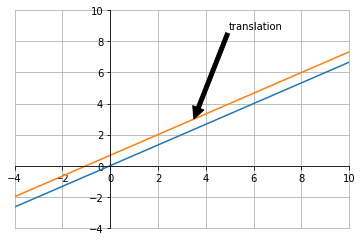

In [9]:
X = np.linspace(-4, 10, num=50, endpoint=True)
# 원점을 지나는 직선
Y = (2/3) * X

# [X+0.5, y+1] 평행이동
Y2 = (2/3) * (X+0.5) + (1/3)

fig, ax = plt.subplots()

for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')

# Hide the other spines...  
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')


ax.plot(X, Y)
ax.plot(X, Y2)
ax.annotate('translation', xy=(3.5, 3), xycoords='data',
            xytext=(0.8, 0.95), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.001),
            horizontalalignment='right', verticalalignment='top')
ax.axis([-4, 10, -4, 10])
ax.grid()

plt.show()

이제는 평면에 대해 적용해 보자. 

*Example 4.5.1* 점 $u_1=[1,0,4.4], u_2=[0,1,4], u_3=[0,0,3]$을 지나는 평면이 있다. 이평면을 벡터공간의 평행이동으로 어떻게 나타낼 수 있을까? <br />
$a=u_2-u_1, b=u_3-u_1$라 하고, $\mathcal{V}$는 벡터공간 $Span\{a, b\}$라고 하자. 그러면 평면의 평행이동은 $u_1 + \mathcal{V}$로 나타낼 수 있다. <br />
따라서, 평면 $u_1 + \mathcal{V}$는 점 $u_1, u_2, u_3$을 포함하는 평면이다.  `matplotlib`모듈을 이용하여 나타내면 아래와 같다.

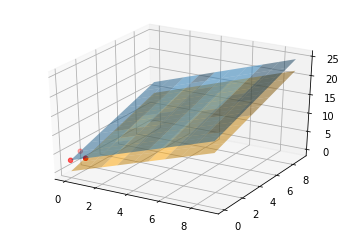

In [10]:
xx, yy = np.meshgrid(range(10), range(10))

zz = 1.4*xx + 1.0*yy  ## 1.4 X + y - z = 0
zz2 = 1.4*xx + 1.0*yy + 3  # 1.4x + y + -z + 3 = 0  즉, z축으로 +3만큼 평행이동

ax = plt.subplot(projection='3d')
ax.plot_surface(xx, yy, zz, alpha=.5, linewidth=0, zorder=-1, color='orange')
ax.plot_surface(xx, yy, zz2, alpha=.5, linewidth=0, zorder=-1)
ax.scatter([1, 0, 0], [0, 1, 0], [4.4, 4, 3], color='red')
plt.show()

### 4.5.2 아핀결합(Affine combinations)

[3.6.4](http://nbviewer.jupyter.org/github/ExcelsiorCJH/Study/blob/3bea72ff32c5bb2737ba1f1009acf71588fdfd98/LinearAlgebra/CodingTheMatrix/Chap03%20-%20The%20Vector/Chap03-The_Vector.ipynb#3.6.1-%EC%9B%90%EC%A0%90%EC%9D%84-%EC%A7%80%EB%82%98%EC%A7%80-%EC%95%8A%EB%8A%94-%EC%84%A0%EB%B6%84%EA%B3%BC-%EC%A7%81%EC%84%A0) 에서 점 $u$와 $v$를 지나는 직선을 나타내는 방법을 살펴보았다. 

- **Definition** : 선형결합 $\alpha_1 u_1 + \cdots + \alpha_n u_n$에서 계수들의 합 즉, $\alpha_1 + \cdots + \alpha_n = 1$이면 *아핀결합(Affine combination)*이라고 한다.

***Example 4.5.4*** : Example 4.5.1에서 $u_1, u_2, u_3$을 지나는 평면을 다음과 같이 표현했다.

$$u_1 + \mathcal{V}$$

여기서, $\mathcal{V} = Span\{u_2-u_1, u_3-u_1\}$ 이다. $\mathcal{V}$에 있는 벡터들은 아래의 선형결합으로 나타낼 수 있다.

$$\alpha (u_2-u_1) + \beta (u_3-u_1)$$

따라서, $u_1 + \mathcal{V}$ 내의 벡터들은 다음의 선형결합으로 표현할 수 있다.

$$u_1 + \alpha (u_2-u_1) + \beta (u_3-u_1) \\  = (1-\alpha - \beta)u_1 + \alpha u_2 + \beta u_3$$

$\gamma = 1 - \alpha - \beta$라고 하면 

$$\gamma u_1 + \alpha u_2 + \beta u_3$$

즉 $u_1 + \mathcal{V}$ 내 벡터들은 $u_1, u_2, u_3$의 모든 아핀결합들로 구성된 집합이다. 

<br />

- **Definition** : 어떤 벡터 컬렉션의 모든 아핀결합으로 구성된 집합은 그 컬렉션의 *Affine hull*이라고 한다. 

***Example 4.5.5*** : $\{[0.5,1], [3.5,3]\}$의 Affine hull은 무엇인가?  [3.6.4](http://nbviewer.jupyter.org/github/ExcelsiorCJH/Study/blob/3bea72ff32c5bb2737ba1f1009acf71588fdfd98/LinearAlgebra/CodingTheMatrix/Chap03%20-%20The%20Vector/Chap03-The_Vector.ipynb#3.6.1-%EC%9B%90%EC%A0%90%EC%9D%84-%EC%A7%80%EB%82%98%EC%A7%80-%EC%95%8A%EB%8A%94-%EC%84%A0%EB%B6%84%EA%B3%BC-%EC%A7%81%EC%84%A0) 에서 보았듯이, 

$$\left\{ \alpha [3.5,3]+\beta [0.5,1]:\alpha ,\beta \in \mathbb{ R },\alpha ,\beta \ge 0, \alpha + \beta = 1 \right\}$$

즉, $[0.5,1]$과 $[3.5,3]$을 지나는 직선이다. 

***Example 4.5.6*** :$\{[1,2,3]\}$의 Affine hull은 무엇인가?  <br />

아핀결합으로 나타내면 $\alpha [1,2,3]$이다. 계수는 $\alpha$ 하나 밖에 없으므로 $\alpha =1$이다. 따라서, Affine hull 은 하나의 벡터 $[1,2,3]$으로 구성된다. 

- **Proposition**
  - $1$-벡터 컬렉션의 Affine hull은 한 점(컬렉션 내의 하나의 벡터), 즉 $0$-차원 객체이다.
  - $2$-벡터 컬렉션의 Affine hull은 직선(두 벡터를 지나는 직선), 즉 $1$-차원 객체이다.
  - $3$-벡터 컬렉션의 Affine hull은 평면(세 벡터를 지나는 평면), 즉 $2$-차원 객체이다.

***Example 4.5.7*** : $\{[2,3], [3,4], [4,5]\}$ 의 Affine hull은 무엇인가? <br />
위의 Proposition 대로라면 3-벡터 이므로 Affine hull 은 평면이라고 생각하겠지만, 실제로 코드를 작성해 보면 직선이다. 그 이유는 위의 세 벡터들이 한 직선 상에 놓여있기 때문이다. 

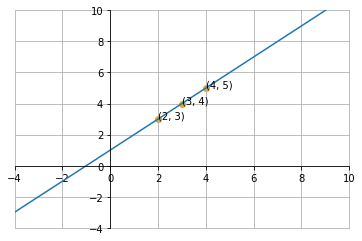

In [14]:
X = np.linspace(-4, 10, num=50, endpoint=True)

Y = X + 1

fig, ax = plt.subplots()

for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')

# Hide the other spines...  
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')


ax.scatter([2, 3, 4], [3, 4, 5], color='orange')
ax.plot(X, Y)
ax.annotate('(2, 3)', xy=(2, 3))
ax.annotate('(3, 4)', xy=(3, 4))
ax.annotate('(4, 5)', xy=(4, 5))
ax.axis([-4, 10, -4, 10])
ax.grid()

plt.show()

### 4.5.3 아핀공간 (Affine Space)

- **Definition** : *아핀공간* 은 벡터공간을 평행이동한 결과이다. 즉, 집합 $\mathcal{A}$는 다음을 만족하는 벡터 $a$와 벡터공간 $\mathcal{V}$가 있으면 아핀공간이다. <br />
  $$\mathcal{A} = \{a + v : v \in \mathcal{V} \}$$ <br />
  즉, $\mathcal{A}=v + \mathcal{V}$ 이다. 
- **Lemma 4.5.10** : 임의의 벡터 $u_1, ..., u_n$에 대해 다음이 성립한다. <br />
  $$\{\alpha_1 u_1 + \cdots + \alpha_n u_n :  \sum _{ i=1 }^{ n }{ \alpha_i }=1\} \\ =\{u_1 + v : v \in Span \{ u_2 - u_1, ..., u_n - u_1\}\}$$
  즉, $u_1, .., u_n$의 Affine hull은 $u_1$을 $u_2-u_1, ..., u_n-u_1$의 생성(Span)에 있는 각 벡터에 더함으로써 얻어지는 집합과 동일하다. 

![](./images/proof02.PNG)

위의 내용에서 아핀공간을 아래의 두 가지 방법으로 표현할 수 있다는 것을 알 수 있다.

- $a +  \mathcal{V}$, 여기서 $\mathcal{V}$는 어떤 벡터들의 생성 즉, 벡터공간
- 어떤 벡터들의 Affine hull

### 4.5.4 아핀공간을 선형시스템의 해집합으로 표현하기 

[4.3.2]() 에서 원점을 포함하는 flat이 동차 선형시스템(homogeneous linear system)으로 표현할 수 있는 예들을 보았다. 이번에는 원점을 포함하지 않는 flat을 비동차 선형시스템의 해집합으로 표현해보자.

***Example 4.5.12*** : Example 4.5.1 에서 보았듯이, 점 $[1,0,4.4],[0,1,4],[0,0,3]$을 지나는 평면은 이 점들의 Affine hull 이다. 이 평면은 또한 방정식 $1.4x + y - z = -3$의 해집합이며 다음과 같이 나타낼 수 있다. ($ax+by+cz+d=0$ 에 대입하여 연립방정식을 풀면 된다.)

$$\{[x,y,z] \in \mathbb{R}^3 : [1.4,1,-1] \cdot [x, y, z] = -3 \}$$

아래는 위의 예제에 대한 그래프를 `matplotlib`을 이용해 나타냈다.

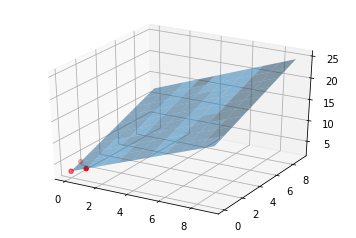

In [15]:
xx, yy = np.meshgrid(range(10), range(10))

zz = 1.4*xx + 1.0*yy + 3  # 1.4x + y -z + 3 = 0  즉, z축으로 +3만큼 평행이동

ax = plt.subplot(projection='3d')
ax.plot_surface(xx, yy, zz, alpha=.5, linewidth=0, zorder=-1)
ax.scatter([1, 0, 0], [0, 1, 0], [4.4, 4, 3], color='red')
plt.show()

### 4.5.5 두 가지 표현법 - 다시 보기
4.3.3에서 원점을 포함하는 flat들에 대해 살펴 보았 듯이 두 가지 방법으로 표현할 수 있다. <br />
한 가지 방법은 Span으로 표현하는 방법이 있고, 다른 하나는 해집합을 이용해 표현하는 방법이 있다.

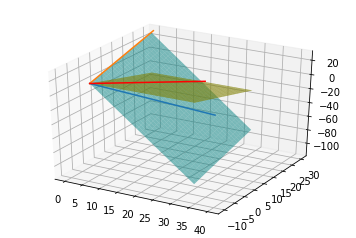

In [16]:
xx, yy = np.meshgrid(range(30), range(30))

z1 = -4*xx + yy
z2 = -1*yy
z3 = 0.5*xx + yy
ax = plt.subplot(projection='3d')
ax.plot([0, 4, 40], [0, -1, -10], [0, 1, 10])
ax.plot([0, 0, 0],[0, 1, 30],[0, 1, 30])
ax.plot([0 ,1, 10, 15],[0, 2, 20, 30],[0, -2, -20, -30], color='red')
ax.plot_surface(xx, yy, z1, color='cyan', alpha=.5)
ax.plot_surface(xx, yy, z2, color='yellow', alpha=.7)
# ax.plot_surface(xx, yy, z3, color='black', alpha=.5, linewidth=0, zorder=-1)
plt.show()

## 4.6 동차 혹은 비동차 선형시스템

4.4 에서 동차 선형시스템의 해집합이 벡터공간인 것을 알아 보았다. 

### 4.6.1 일반적인 선형시스템에 대응하는 동차 선형시스템

- **Lemma** : $u_1$을 선형방정식들의 시스템의 해라고 하면 

  $$a_1 \cdot x = \beta_1 \\ \vdots \\ a_m \cdot x = \beta_m$$

  그리고, 또 다른 벡터 $u_2$가 해가 될 필요충분조건은 $u_2 - u_1$이 대응하는 동차 방정식들의 시스템에 대한 해가 되는 것이다.

  $$a_1 \cdot x = 0 \\ \vdots \\ a_m \cdot x = 0$$

  - **Proof** <br />

    $i = 1, …, m$에 대해, $a_i \cdot u_1=\beta_i$이고, $a_i \cdot u_2 = \beta_i$ 이다. 따라서, $a_i \cdot u_2 - a_1 \cdot u_1 = 0$ 이고 $a_i(u_2 - u_1) = 0$ 

동차 선형시스템에 대한 해집합을 벡터공간 $\mathcal{V}$라고 하면 Lemma 를 아래와 같이 나타낼 수 있다.

-  $u_2$가 original 선형시스템에 대한 해가 될 필요충분조건은 $u_2 -u_1$이 $\mathcal{V}$ 내에 있는 것이다.

$v = u_2 - u_1$이라 하면 ($u_2 = u_1 + v$) 다음과 같이 쓸 수 있다.

- $u_1 + v$가 original 선형시스템에 대한 해가 될 필요충분조건은 $v$가 $\mathcal{V}$내에 있어야 한다.

즉, 

$$\{solutions\_to\_original\_linear\_system\} = \{u_1 + v : v \in \mathcal{V}\}$$

우변의 집합은 아핀공간(Affine Space) 이다. 

- **Theorem** : 임의의 선형시스템에 대해, 해집합은 공집합이거나 또는 아핀공간이다.

### 4.6.2 해의 개수 - 다시보기

**Corollary** : 선형 시스템의 해가 유일(unique)하게 될 필요충분조건은 동차 선형시스템에 대한 유일한 해가 영벡터일 때 이다.